In [2]:
!pip install tensorflow

In [4]:
from sklearn.datasets import load_breast_cancer

In [8]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df,test_size=0.25, random_state=4)

In [10]:
# Normalize features to range (0,1)
max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range_val = max_val - min_val
train_df = (train_df - min_val) / range_val
val_df = (val_df - min_val) / range_val

In [11]:
# Split features and target
X_train = train_df.drop('target', axis=1)
X_val = val_df.drop('target', axis=1)
y_train = train_df['target']
y_val = val_df['target']
input_shape = [X_train.shape[1]]
input_shape

[30]

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(input_shape[0],))
])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(input_shape[0],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # For binary classification
])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,209 (24.25 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')

In [20]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=30,  # total epoch

                   )

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.3479 - val_loss: 0.3455
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3300 - val_loss: 0.3314
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3168 - val_loss: 0.3178
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2989 - val_loss: 0.3039
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2854 - val_loss: 0.2905
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2760 - val_loss: 0.2773
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2642 - val_loss: 0.2643
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2450 - val_loss: 0.2522
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.2363 - val_loss: 0.2407
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2241 - val_loss: 0.2306
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2158 - val_loss: 0.2213
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2022 - val_loss: 0.212

In [21]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[3.8664505e-01],
       [9.3257558e-01],
       [1.2650822e-04]], dtype=float32)

In [22]:
y_val.iloc[0:3]

,target
340,1.0
382,1.0
300,0.0


<Axes: >

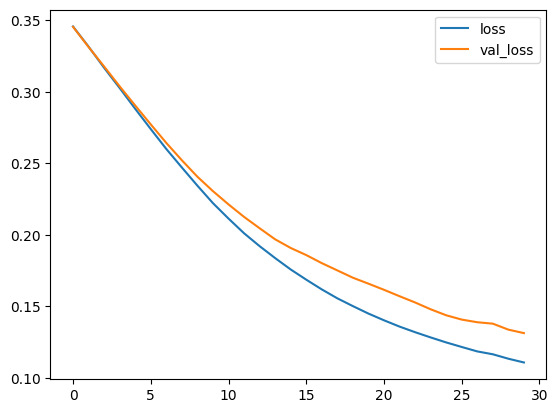

In [ ]:
loss_df = pd.DataFrame(losses.history)

# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()